In [1]:
import numpy as np

In [2]:
testsmall =[
"########",
"#..O.O.#",
"##@.O..#",
"#...O..#",
"#.#.O..#",
"#...O..#",
"#......#",
"########",
]
testlarge = [
"##########",
"#..O..O.O#",
"#......O.#",
"#.OO..O.O#",
"#..O@..O.#",
"#O#..O...#",
"#O..O..O.#",
"#.OO.O.OO#",
"#....O...#",
"##########"
]

longmoves="<vv>^<v^>v>^vv^v>v<>v^v<v<^vv<<<^><<><>>v<vvv<>^v^>^<<<><<v<<<v^vv^v>^vvv<<^>^v^^><<>>><>^<<><^vv^^<>vvv<>><^^v>^>vv<>v<<<<v<^v>^<^^>>>^<v<v><>vv>v^v^<>><>>>><^^>vv>v<^^^>>v^v^<^^>v^^>v^<^v>v<>>v^v^<v>v^^<^^vv<<<v<^>>^^^^>>>v^<>vvv^><v<<<>^^^vv^<vvv>^>v<^^^^v<>^>vvvv><>>v^<<^^^^^^><^><>>><>^^<<^^v>>><^<v>^<vv>>v>>>^v><>^v><<<<v>>v<v<v>vvv>^<><<>^><^>><>^v<><^vvv<^^<><v<<<<<><^v<<<><<<^^<v<^^^><^>>^<v^><<<^>>^v<v^v<v^>^>>^v>vv>^<<^v<>><<><<v<<v><>v<^vv<<<>^^v^>^^>>><<^v>>v^v><^^>>^<>vv^<><^^>^^^<><vvvvv^v<v<<>^v<v>v<<^><<><<><<<^^<<<^<<>><<><^^^>^^<>^>v<>^^>vv<^v^v<vv>^<><v<^v>^^^>>>^^vvv^>vvv<>>>^<^>>>>>^<<^v>^vvv<>^<><<v>v^^>>><<^^<>>^v^<v^vv<>v^<<>^<^v^v><^<<<><<^<v><v<>vv>>v><v^<vv<>v^<<^"
shortmoves="<^^>>>vv<v>>v<<"

In [66]:
def vizualizemap(m):
    mcopy = np.zeros(m.shape)
    #np.where()
    mcopy[m=="."]=500
    mcopy[m=="#"]=-1000
    mcopy[m=="["]=0
    mcopy[m=="O"]=0
    mcopy[m=="]"]=0
    mcopy[m=="@"]=1000
    plt.pcolor(mcopy, cmap='magma')
    plt.show()
    

In [3]:
def transforminput(ipt):
    out = []
    for l in ipt: out.append([c for c in l])
    return np.array(out)

def getGPS(ipt):
    coords = np.where(ipt=="O")
    return np.sum(100*coords[0])+np.sum(coords[1])

def findRobot(m):
    return [ int(e[0]) for e in np.where(m=="@")]
    
def updateMap(m, mv):
    if mv == "<": 
        return np.flip(updateMap(np.flip(m, 1), ">"),1)
    if mv == "^": 
        return np.flip(updateMap(np.flip(m, 0), "v"),0)
    robot = findRobot(m)
    if mv =="v":
        ahead = m[robot[0]:,robot[1]]
        if "." in ahead:
            free = [ int(e[0]) for e in np.where(ahead==".")]
            blocked = [ int(e[0]) for e in np.where(ahead=="#")]
            if free[0]<blocked[0]:
                if free[0] == 1:
                    m[robot[0], robot[1]]="."
                    m[ robot[0]+1, robot[1] ] = "@"
                else:
                    m[robot[0], robot[1]]="."
                    m[ robot[0]+1, robot[1] ] = "@"
                    m[ robot[0]+2:robot[0]+free[0]+1, robot[1] ] ="O"
        if mv == "v": m = np.flip(m, 0)
    if mv == ">":
        ahead = m[robot[0],robot[1]:]
        if "." in ahead:
            free = [ int(e[0]) for e in np.where(ahead==".")]
            blocked = [ int(e[0]) for e in np.where(ahead=="#")]
            if free[0]<blocked[0]:
                if free[0] == 1:
                    m[robot[0], robot[1]]="."
                    m[robot[0], robot[1]+1] = "@"
                else:
                    m[robot[0], robot[1]]="."
                    m[ robot[0], robot[1]+1 ] = "@"
                    m[ robot[0], robot[1]+2:robot[1]+free[0]+1 ] ="O"
        if mv == "<": m = np.flip(m, 1)
    return m   

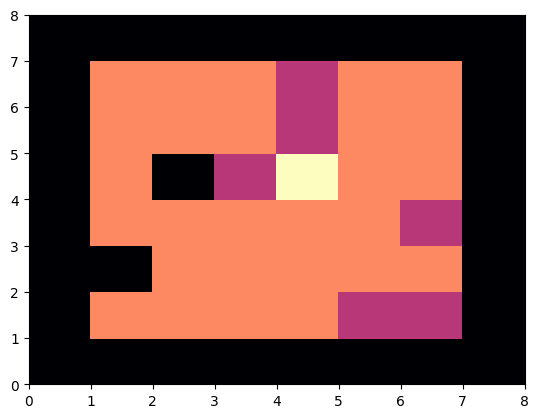

2028


In [70]:
a=transforminput(testsmall)
vizualizemap(a)
for c in shortmoves:
    clear_output(wait=True)
    updateMap(a,c)
    #vizualizemap(a)
    #print(getGPS(a))
vizualizemap(a)
print(getGPS(a))

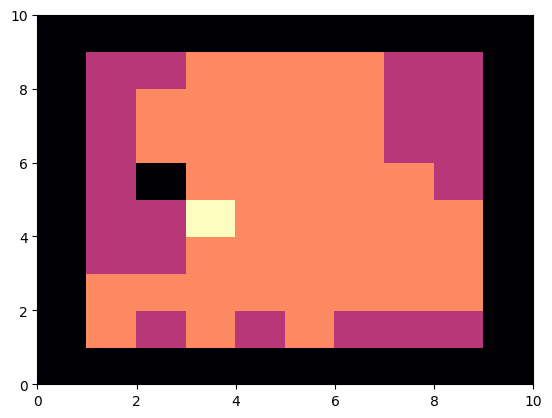

10092


In [72]:
a=transforminput(testlarge)
vizualizemap(a)
for c in longmoves:
    clear_output(wait=True)
    updateMap(a,c)
    #vizualizemap(a)
    #print(getGPS(a))
vizualizemap(a)
print(getGPS(a))

In [6]:
ipt = [ l.strip("\n") for l in open("input.txt") ]
ipt_m = []
ipt_mv = ""
for l in ipt:
    if "#" in l: ipt_m.append(l)
    if "^" in l or "v" in l or "<" in l or ">" in l : ipt_mv+=l

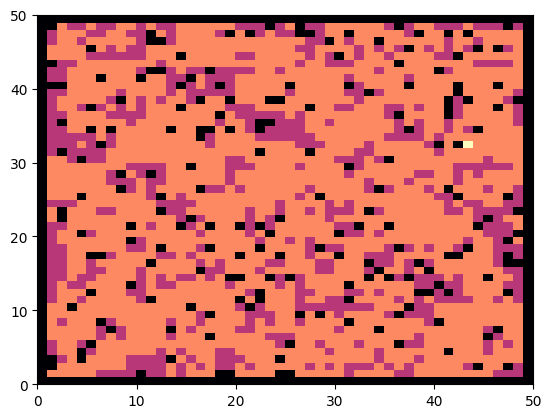

1414416


In [74]:
a=transforminput(ipt_m)
vizualizemap(a)
for c in ipt_mv:
    clear_output(wait=True)
    updateMap(a,c)
    #vizualizemap(a)
    #print(getGPS(a))
vizualizemap(a)
print(getGPS(a))

In [8]:
#part2
def largefy(ipt):
    out = []
    for l in ipt:
        out.append(l.replace("#","##").replace(".","..").replace("O","[]").replace("@","@."))
    return out

####################
##....[]....[]..[]##
##............[]..##
##..[][]....[]..[]##
##....[]@.....[]..##
##[]##....[]......##
##[]....[]....[]..##
##..[][]..[]..[][]##
##........[]......##
####################


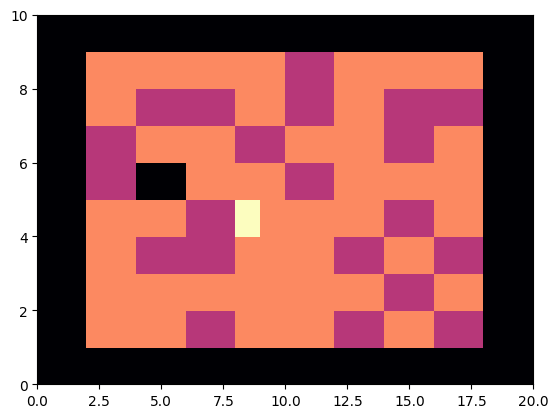

In [75]:
a=largefy(testlarge)
for ia in a: print(ia)
vizualizemap(transforminput(a))

In [10]:
def flipLarge(m, a):
    flipped = np.flip(m, a)
    if a != 0:
        left = flipped=="["
        right = flipped=="]"
        flipped[left] = "]"
        flipped[right] = "["
    return flipped
def updateMapLarge(m, mv):
    if mv == "<":
        return flipLarge(updateMapLarge(flipLarge(m, 1), ">"),1)
    if mv == "^": 
        return flipLarge(updateMapLarge(flipLarge(m, 0), "v"),0)
    robot = findRobot(m)
    if mv ==">":
        ahead = m[robot[0],robot[1]:]
        if "." in ahead:
            free = [ int(e[0]) for e in np.where(ahead==".")]
            blocked = [ int(e[0]) for e in np.where(ahead=="#")]
            if free[0]<blocked[0]:
                if free[0] == 1:
                    m[robot[0], robot[1]]="."
                    m[ robot[0], robot[1]+1 ] = "@"
                else:
                    m[robot[0], robot[1]]="."
                    m[ robot[0], robot[1]+1 ] = "@"
                    for i in range(robot[1]+2,robot[1]+free[0]+1):
                        if ((robot[1]+2)-i) %2== 0:
                            m[robot[0], i] = "["
                        else: m[robot[0], i] = "]"
    elif mv == "v":
        ahead = m[robot[0]:,robot[1]]
        if "." in ahead:
            free = [ int(e[0]) for e in np.where(ahead==".")]
            blocked = [ int(e[0]) for e in np.where(ahead=="#")]
            if free[0]<blocked[0]:
                if free[0] == 1:
                    m[robot[0], robot[1]]="."
                    m[ robot[0]+1, robot[1] ] = "@"
                else: #boxes ahead...
                    canmove = True
                    mcopy = m.copy()
                    if m[robot[0]+1, robot[1]] == "[": canmove, mcopy = moveBox(mcopy, [robot[0]+1, robot[1]])
                    elif m[robot[0]+1, robot[1]] == "]": canmove, mcopy = moveBox(mcopy, [robot[0]+1, robot[1]-1])
                    if canmove:
                        mcopy[robot[0], robot[1]]="."
                        mcopy[ robot[0]+1, robot[1] ] = "@"
                        m=mcopy
    return m
  

In [11]:
def moveBox(m, posL):
    Lahead = m[posL[0]+1, posL[1]]
    Rahaed = m[posL[0]+1, posL[1]+1]
    canmove = True
    mcopy = m.copy()
    if Lahead == "#" or Rahaed =="#": return False, m # cant move!
    elif Lahead!="." or Rahaed!=".":
        if Lahead=="[":
            canmove, mcopy = moveBox(mcopy, [posL[0]+1, posL[1]])
            if not canmove: return False, m # cant move!
        elif Lahead=="]":
            canmove, mcopy = moveBox(mcopy, [posL[0]+1, posL[1]-1])
            if not canmove: return False, m # cant move!
        if Rahaed == "[":
            canmove, mcopy = moveBox(mcopy, [posL[0]+1, posL[1]+1])
            if not canmove: return False, m # cant move!
    mcopy[posL[0], posL[1]:posL[1]+2] ="."
    mcopy[posL[0]+1, posL[1]]="["
    mcopy[posL[0]+1, posL[1]+1]="]"
    return canmove, mcopy
            
            
def getGPSLarge(ipt):
    coords = np.where(ipt=="[")
    return np.sum(100*coords[0])+np.sum(coords[1])

In [12]:
def printMap(m):
    for l in m:
        out=""
        for l2 in l: out+=l2
        print(out)

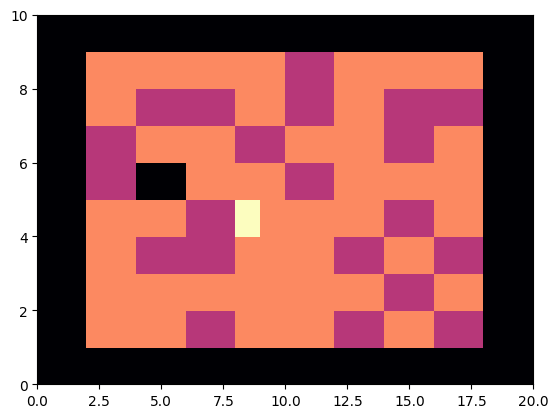

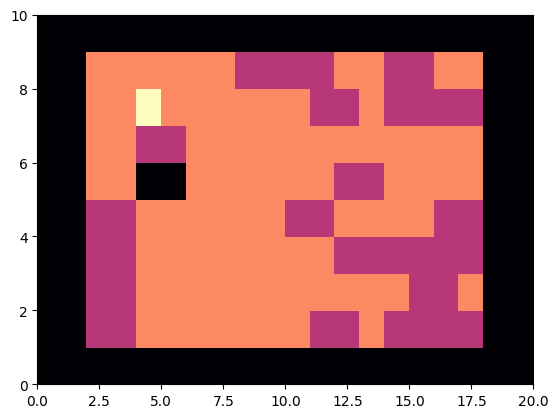

np.int64(9021)

In [58]:
a=transforminput(largefy(testlarge))
vizualizemap(a)
for c in longmoves:
    a = updateMapLarge(a,c)
vizualizemap(a)
getGPSLarge(a)

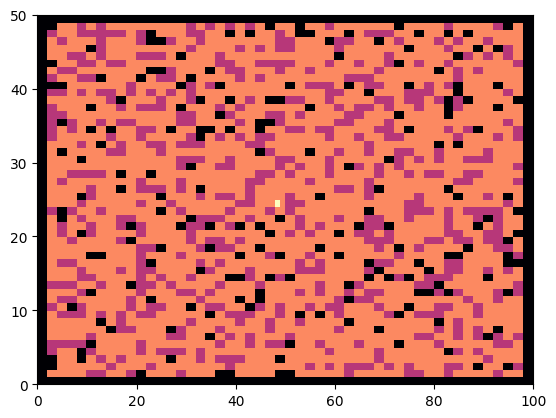

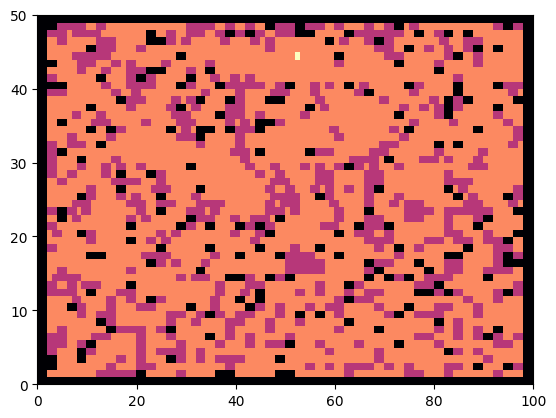

np.int64(1386070)

In [56]:
a=transforminput(largefy(ipt_m))
vizualizemap(a)
for c in ipt_mv:
    a=updateMapLarge(a,c)
vizualizemap(a)
getGPSLarge(a)

In [17]:
# animation :)
import time
from IPython.display import clear_output
import matplotlib.pyplot as plt

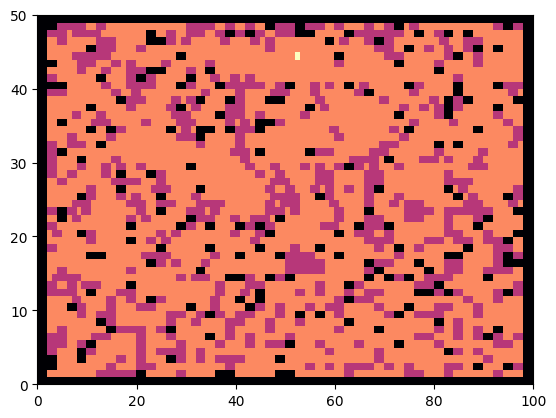

1386070


In [51]:
a=transforminput(largefy(ipt_m))
vizualizemap(a)
for c in ipt_mv:
    clear_output(wait=True)
    a=updateMapLarge(a,c)
    vizualizemap(a)
    print(getGPSLarge(a))

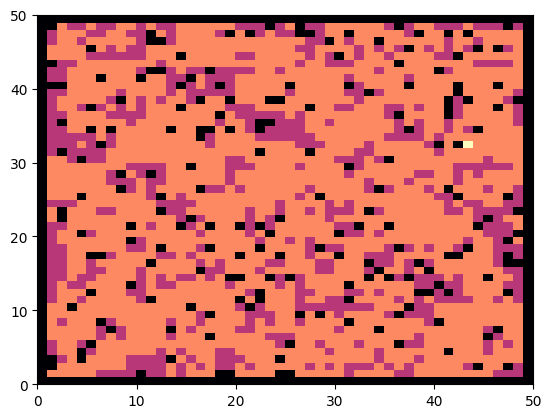

1414416


In [50]:
a=transforminput(ipt_m)
vizualizemap(a)
for c in ipt_mv:
    clear_output(wait=True)
    updateMap(a,c)
    vizualizemap(a)
    print(getGPS(a))